# **Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import plotly.express as px

# **Loading Dataset**

In [ ]:
df = pd.read_csv("sales_data_sample.csv", encoding= 'unicode_escape')
df

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,Motorcycles,95,S10_1678,Corporate Gift Ideas Co.,6505551386,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,10350,20,100.00,15,2244.40,12/2/2004 0:00,Shipped,4,12,2004,Ships,54,S72_3212,Euro Shopping Channel,(91) 555 94 44,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Small
2819,10373,29,100.00,1,3978.51,1/31/2005 0:00,Shipped,1,1,2005,Ships,54,S72_3212,"Oulu Toy Supplies, Inc.",981-443655,Torikatu 38,NaN,Oulu,NaN,90110,Finland,EMEA,Koskitalo,Pirkko,Medium
2820,10386,43,100.00,4,5417.57,3/1/2005 0:00,Resolved,1,3,2005,Ships,54,S72_3212,Euro Shopping Channel,(91) 555 94 44,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Medium
2821,10397,34,62.24,1,2116.16,3/28/2005 0:00,Shipped,1,3,2005,Ships,54,S72_3212,Alpha Cognac,61.77.6555,1 rue Alsace-Lorraine,NaN,Toulouse,NaN,31000,France,EMEA,Roulet,Annette,Small


# **Data Pre-processing**

### first, let see the data type of our data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


### Drop Some Columns

In [ ]:
df = df.drop(['PHONE', 'ADDRESSLINE1', 'ADDRESSLINE2', 'POSTALCODE', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME'], axis=1)
df

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,CITY,STATE,COUNTRY,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,Motorcycles,95,S10_1678,Land of Toys Inc.,NYC,NY,USA,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,Motorcycles,95,S10_1678,Reims Collectables,Reims,NaN,France,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,Motorcycles,95,S10_1678,Lyon Souveniers,Paris,NaN,France,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,Motorcycles,95,S10_1678,Toys4GrownUps.com,Pasadena,CA,USA,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,Motorcycles,95,S10_1678,Corporate Gift Ideas Co.,San Francisco,CA,USA,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,10350,20,100.00,15,2244.40,12/2/2004 0:00,Shipped,4,12,2004,Ships,54,S72_3212,Euro Shopping Channel,Madrid,NaN,Spain,Small
2819,10373,29,100.00,1,3978.51,1/31/2005 0:00,Shipped,1,1,2005,Ships,54,S72_3212,"Oulu Toy Supplies, Inc.",Oulu,NaN,Finland,Medium
2820,10386,43,100.00,4,5417.57,3/1/2005 0:00,Resolved,1,3,2005,Ships,54,S72_3212,Euro Shopping Channel,Madrid,NaN,Spain,Medium
2821,10397,34,62.24,1,2116.16,3/28/2005 0:00,Shipped,1,3,2005,Ships,54,S72_3212,Alpha Cognac,Toulouse,NaN,France,Small


### Checking NA

In [ ]:
df.isna().sum()

ORDERNUMBER           0
QUANTITYORDERED       0
PRICEEACH             0
ORDERLINENUMBER       0
SALES                 0
ORDERDATE             0
STATUS                0
QTR_ID                0
MONTH_ID              0
YEAR_ID               0
PRODUCTLINE           0
MSRP                  0
PRODUCTCODE           0
CUSTOMERNAME          0
CITY                  0
STATE              1486
COUNTRY               0
DEALSIZE              0
dtype: int64

### Since there are many NA in STATE Coloumn, we are going to drop it.

In [ ]:
df = df.drop(['STATE'],axis=1)

### Checking Duplicated Data

In [ ]:
df.duplicated().sum()

0

### Checking Unique Values

In [ ]:
for col in df.columns:
    print(f'Number of {col} unique values: {df[col].nunique()}')

Number of ORDERNUMBER unique values: 307
Number of QUANTITYORDERED unique values: 58
Number of PRICEEACH unique values: 1016
Number of ORDERLINENUMBER unique values: 18
Number of SALES unique values: 2763
Number of ORDERDATE unique values: 252
Number of STATUS unique values: 6
Number of QTR_ID unique values: 4
Number of MONTH_ID unique values: 12
Number of YEAR_ID unique values: 3
Number of PRODUCTLINE unique values: 7
Number of MSRP unique values: 80
Number of PRODUCTCODE unique values: 109
Number of CUSTOMERNAME unique values: 92
Number of CITY unique values: 73
Number of COUNTRY unique values: 19
Number of DEALSIZE unique values: 3


In [ ]:
df['PRODUCTLINE'].unique()

array(['Motorcycles', 'Classic Cars', 'Trucks and Buses', 'Vintage Cars',
       'Planes', 'Ships', 'Trains'], dtype=object)

In [ ]:
df['DEALSIZE'].unique()

array(['Small', 'Medium', 'Large'], dtype=object)

# **EDA**

### Product that has the most transaction was Classic Car with 967 pieces.

In [ ]:
most_transaction = df.groupby('PRODUCTLINE')[['QUANTITYORDERED']].count().sort_values('QUANTITYORDERED', ascending=False)
most_transaction.reset_index(inplace=True)
most_transaction

,PRODUCTLINE,QUANTITYORDERED
0,Classic Cars,967
1,Vintage Cars,607
2,Motorcycles,331
3,Planes,306
4,Trucks and Buses,301
5,Ships,234
6,Trains,77


### The most ordered product was Classic Cars with 33992 cars sold

In [ ]:
productordered = df.groupby('PRODUCTLINE')[['QUANTITYORDERED']].sum().sort_values('QUANTITYORDERED', ascending=False)
productordered.reset_index(inplace=True)
productordered

,PRODUCTLINE,QUANTITYORDERED
0,Classic Cars,33992
1,Vintage Cars,21069
2,Motorcycles,11663
3,Trucks and Buses,10777
4,Planes,10727
5,Ships,8127
6,Trains,2712


In [ ]:
fig = px.pie(df,'PRODUCTLINE','QUANTITYORDERED', title="NUMBER OF PRODUCT SOLD")
fig.update_traces(textposition='inside', textinfo='percent+label')

### Checking Outliers

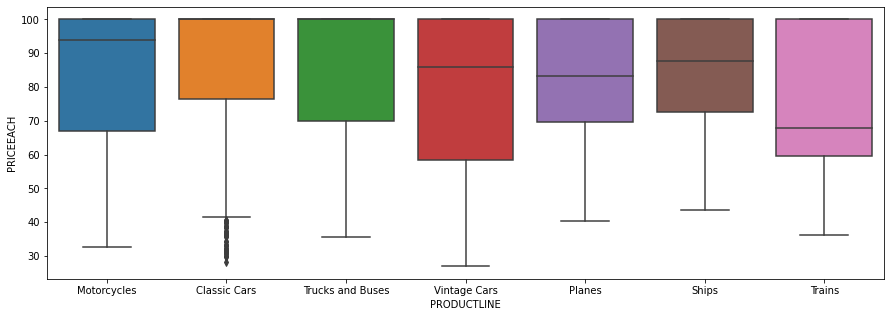

In [ ]:
plt.figure(figsize=(15,5))
sns.boxplot(data=df, x='PRODUCTLINE', y='PRICEEACH')

since there are many outliers, we used median to see each price of products

In [ ]:
eachprice = df.groupby(['PRODUCTLINE'])[['PRICEEACH']].median().sort_values('PRODUCTLINE')
eachprice

,PRICEEACH
PRODUCTLINE,
Classic Cars,100.00
Motorcycles,93.90
Planes,83.22
Ships,87.61
Trains,67.73
Trucks and Buses,100.00
Vintage Cars,86.01


### Number of product sold base on the DealSize

In [ ]:
df.groupby(['DEALSIZE'])[['QUANTITYORDERED']].sum('QUANTITYORDERED')

,QUANTITYORDERED
DEALSIZE,
Large,7414
Medium,52519
Small,39134


In [ ]:
fig = px.pie(df,'DEALSIZE','QUANTITYORDERED', title="NUMBER OF PRODUCT SOLD BASED ON DEALSIZE")
fig.update_traces(textposition='inside', textinfo='percent+label')

### Checking what product that sold the most based on DealSize

from the table below we can see that Classic Cars still dominated the product sold in every DealSize (large,medium,small)

In [ ]:
df.groupby(['DEALSIZE','PRODUCTLINE']).agg({'QUANTITYORDERED':'sum'})

QUANTITYORDERED
DEALSIZE PRODUCTLINE                      
Large    Classic Cars                 4506
         Motorcycles                   916
         Planes                        477
         Trains                         45
         Trucks and Buses              358
         Vintage Cars                 1112
Medium   Classic Cars                19178
         Motorcycles                  5929
         Planes                       5250
         Ships                        4311
         Trains                       1052
         Trucks and Buses             6777
         Vintage Cars                10022
Small    Classic Cars                10308
         Motorcycles                  4818
         Planes                       5000
         Ships                        3816
         Trains                       1615
         Trucks and Buses             3642
         Vintage Cars                 9935

In [ ]:
df_dealsize = df.groupby(['DEALSIZE','PRODUCTLINE']).agg({'QUANTITYORDERED':'sum'})
df_dealsize = df_dealsize.query("PRODUCTLINE=='Classic Cars'").sort_values("QUANTITYORDERED", ascending=False)
df_dealsize.reset_index(inplace=True)
df_dealsize

,DEALSIZE,PRODUCTLINE,QUANTITYORDERED
0,Medium,Classic Cars,19178
1,Small,Classic Cars,10308
2,Large,Classic Cars,4506


In [ ]:
fig = px.pie(df_dealsize,'DEALSIZE','QUANTITYORDERED', title="NUMBER OF CLASICC CARS SOLD BASED ON DEALSIZE")
fig.update_traces(textposition='inside', textinfo='percent+label')

### Total sales based on Product

In [ ]:
top_salesproduct = df.groupby(['PRODUCTLINE'])[['SALES']].sum().sort_values('SALES', ascending=False)
top_salesproduct.reset_index(inplace=True)
top_salesproduct

,PRODUCTLINE,SALES
0,Classic Cars,3919615.66
1,Vintage Cars,1903150.84
2,Motorcycles,1166388.34
3,Trucks and Buses,1127789.84
4,Planes,975003.57
5,Ships,714437.13
6,Trains,226243.47


In [ ]:
fig = px.pie(top_salesproduct, 'PRODUCTLINE', 'SALES', title='TOTAL SALES BASE ON PRODUCTLINE')
fig.update_traces(textposition='inside', textinfo='percent+label')

Text(0, 0.5, 'TOTAL SALES')

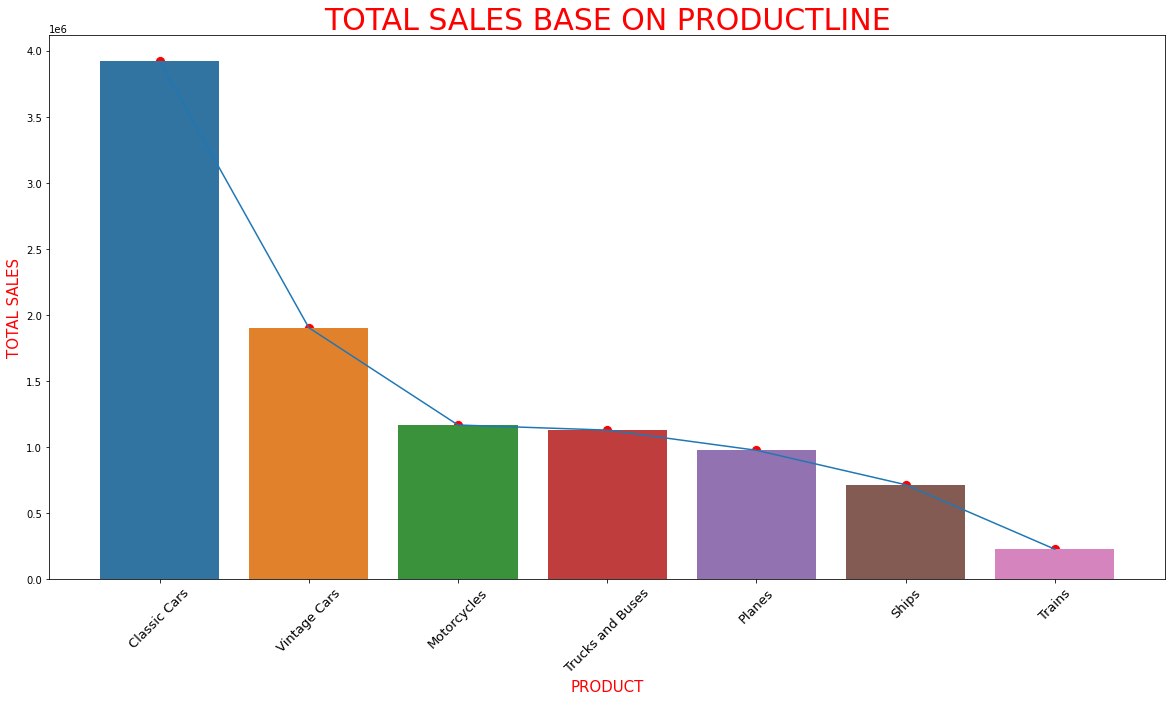

In [ ]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=top_salesproduct, x='PRODUCTLINE', y='SALES', s=100, color='red')
sns.barplot(data=top_salesproduct, x='PRODUCTLINE', y='SALES')
sns.lineplot(data=top_salesproduct, x='PRODUCTLINE', y='SALES')
plt.xticks(rotation=45, fontsize=13)
plt.title("TOTAL SALES BASE ON PRODUCTLINE", fontsize=30, color='red')
plt.xlabel('PRODUCT', fontsize=15, color='Red')
plt.ylabel('TOTAL SALES', fontsize=15, color='Red')

### Total Sales Based on Year

In [ ]:
df_year = df.groupby(['YEAR_ID'])[['SALES']].sum().sort_values("YEAR_ID", ascending=True)
df_year

,SALES
YEAR_ID,
2003,3516979.54
2004,4724162.60
2005,1791486.71


Text(0, 0.5, 'TOTAL SALES')

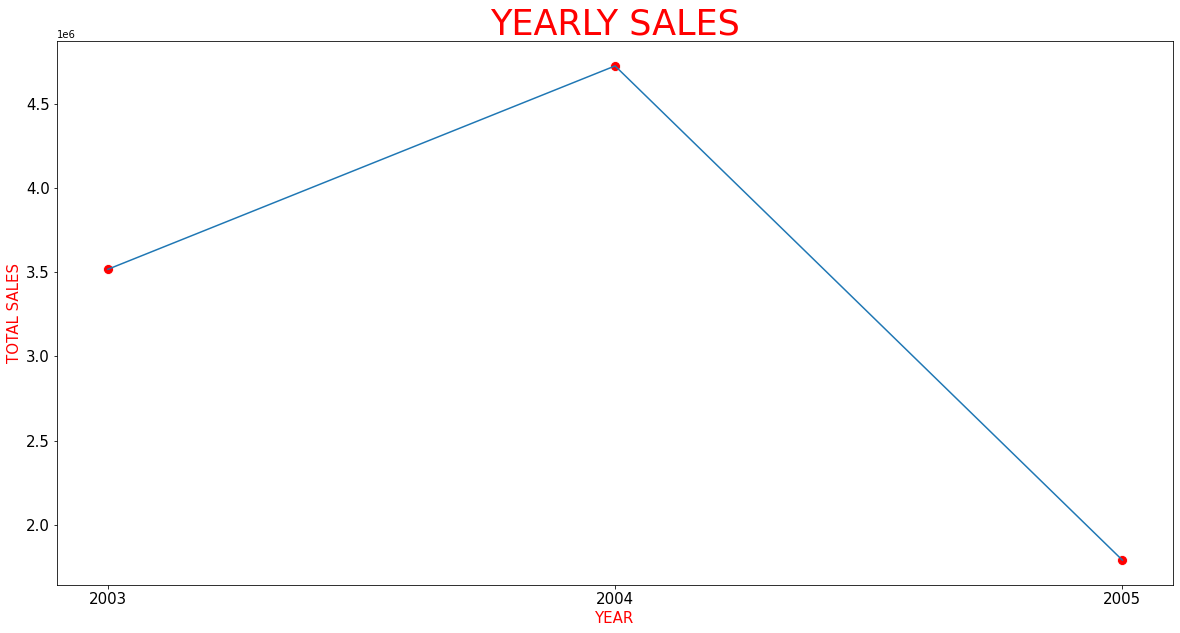

In [ ]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=df_year, x="YEAR_ID", y='SALES', s=100, color='Red')
sns.lineplot(data=df_year, x="YEAR_ID", y='SALES')
plt.xticks([2003,2004,2005],fontsize=15)
plt.yticks(fontsize=15)
plt.title('YEARLY SALES', fontsize=35, color='Red')
plt.xlabel('YEAR', fontsize=15, color='Red')
plt.ylabel('TOTAL SALES', fontsize=15, color='Red')

### Quantity Order Per Year

In [ ]:
quantityperyear = df.groupby(['YEAR_ID'])[['QUANTITYORDERED']].sum().sort_values('YEAR_ID')
quantityperyear.reset_index(inplace=True)
quantityperyear

,YEAR_ID,QUANTITYORDERED
0,2003,34612
1,2004,46824
2,2005,17631


In [ ]:
fig = px.pie(quantityperyear,'YEAR_ID','QUANTITYORDERED', title="Quantity Order Per Year")
fig.update_traces(textposition='inside', textinfo='percent+label+value')

Text(0, 0.5, 'TOTAL PRODUCT SOLD')

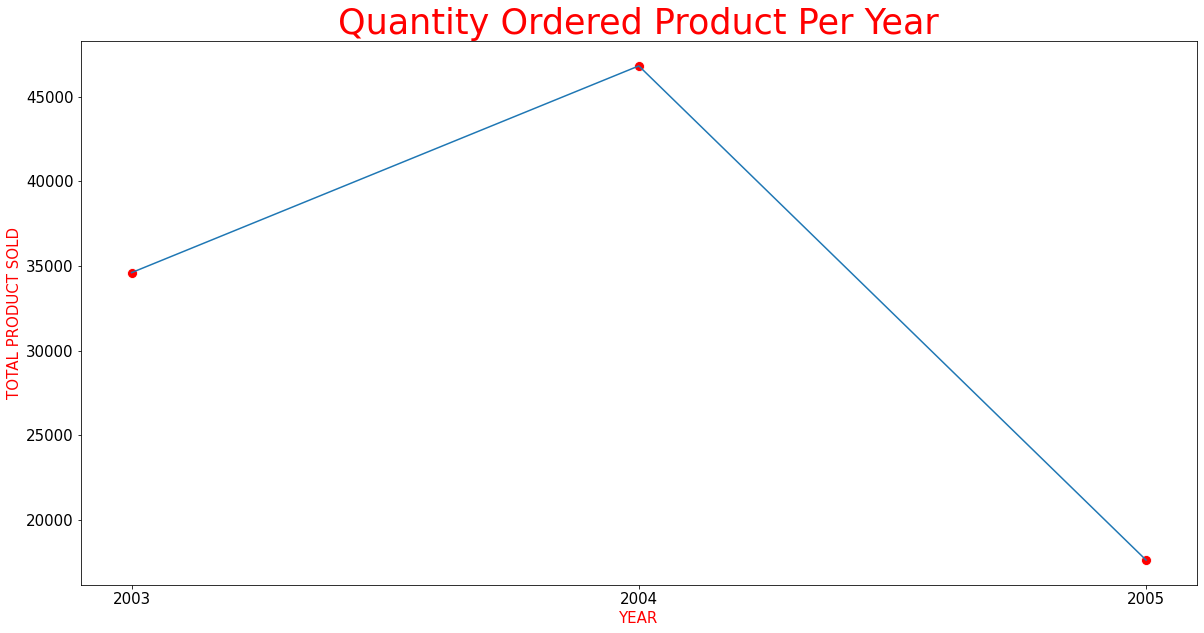

In [ ]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=quantityperyear, x="YEAR_ID", y='QUANTITYORDERED', s=100, color='Red')
sns.lineplot(data=quantityperyear, x="YEAR_ID", y='QUANTITYORDERED')
plt.xticks([2003,2004,2005],fontsize=15)
plt.yticks(fontsize=15)
plt.title('Quantity Ordered Product Per Year', fontsize=35, color='Red')
plt.xlabel('YEAR', fontsize=15, color='Red')
plt.ylabel('TOTAL PRODUCT SOLD', fontsize=15, color='Red')

### Monthly Sales

In [ ]:
sales2003 = df.groupby(['YEAR_ID','MONTH_ID'])[['SALES']].sum()
sales2003 = sales2003.query("YEAR_ID=='2003'")
sales2003

SALES
YEAR_ID MONTH_ID            
2003    1          129753.60
        2          140836.19
        3          174504.90
        4          201609.55
        5          192673.11
        6          168082.56
        7          187731.88
        8          197809.30
        9          263973.36
        10         568290.97
        11        1029837.66
        12         261876.46

In [ ]:
sales2004 = df.groupby(['YEAR_ID','MONTH_ID'])[['SALES']].sum()
sales2004 = sales2004.query("YEAR_ID=='2004'")
sales2004

SALES
YEAR_ID MONTH_ID            
2004    1          316577.42
        2          311419.53
        3          205733.73
        4          206148.12
        5          273438.39
        6          286674.22
        7          327144.09
        8          461501.27
        9          320750.91
        10         552924.25
        11        1089048.01
        12         372802.66

In [ ]:
sales2005 = df.groupby(['YEAR_ID','MONTH_ID'])[['SALES']].sum()
sales2005 = sales2005.query("YEAR_ID=='2005' and MONTH_ID==['1','2','3','4','5']")
sales2005

SALES
YEAR_ID MONTH_ID           
2005    1         339543.42
        2         358186.18
        3         374262.76
        4         261633.29
        5         457861.06

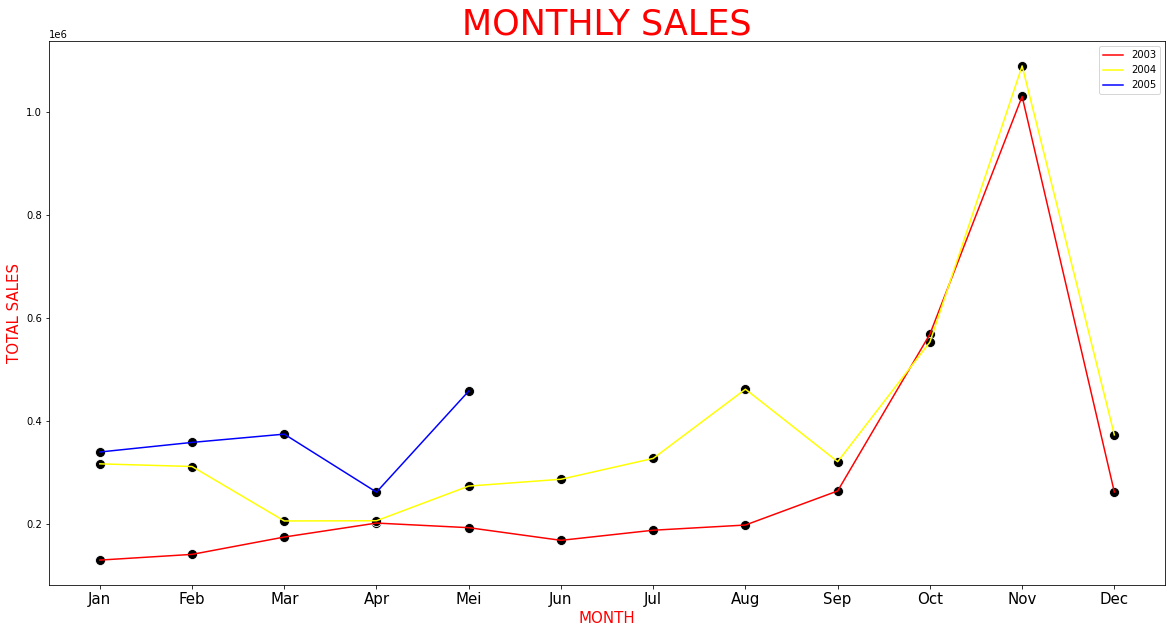

In [ ]:
plt.figure(figsize=(20,10))
sns.lineplot(data=sales2003, x="MONTH_ID", y='SALES', color='Red', label=2003)
sns.lineplot(data=sales2004, x="MONTH_ID", y='SALES', color='Yellow', label=2004)
sns.lineplot(data=sales2005, x="MONTH_ID", y='SALES', color='Blue', label= 2005)
sns.scatterplot(data=sales2003, x="MONTH_ID", y='SALES', s=100, color='Black')
sns.scatterplot(data=sales2004, x="MONTH_ID", y='SALES', s=100, color='Black')
sns.scatterplot(data=sales2005, x="MONTH_ID", y='SALES', s=100, color='Black')

ticks = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
labell = ['Jan', 'Feb', 'Mar', 'Apr', 'Mei', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

plt.xticks(ticks, labell,fontsize=15)
plt.title('MONTHLY SALES', fontsize=35, color='Red')
plt.xlabel('MONTH', fontsize=15, color='Red')
plt.ylabel('TOTAL SALES', fontsize=15, color='Red')
plt.legend()

### Average Monthly Sales

In [ ]:
avg_sales = df.groupby(['YEAR_ID','MONTH_ID'])[['SALES','QUANTITYORDERED']].median()
avg_sales.reset_index(inplace=True)
avg_sales.sort_values('SALES', ascending=False).head(10)

,YEAR_ID,MONTH_ID,SALES,QUANTITYORDERED
27,2005,4,3941.000,46.5
11,2003,12,3506.550,35.5
25,2005,2,3441.820,35.0
14,2004,3,3428.795,34.0
5,2003,6,3408.990,39.5
6,2003,7,3408.885,32.5
0,2003,1,3394.980,35.0
28,2005,5,3386.840,36.0
9,2003,10,3364.210,35.0
17,2004,6,3236.100,34.0


In [ ]:
avg2003 = avg_sales[avg_sales['YEAR_ID']==2003]
avg2004 = avg_sales[avg_sales['YEAR_ID']==2004]
avg2005 = avg_sales[avg_sales['YEAR_ID']==2005]

<Figure size 1440x720 with 0 Axes>

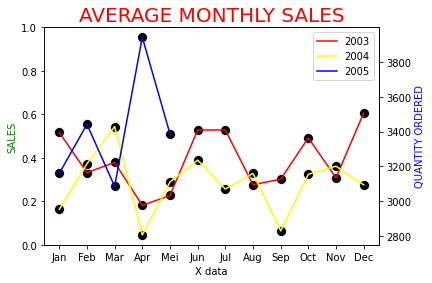

In [ ]:
plt.figure(figsize=(20,10))
fig, ax1 = plt.subplots() # initializes figure and plots

ax2 = ax1.twinx() # applies twinx to ax2, which is the second y axis. 

sns.lineplot(data=avg2003, x="MONTH_ID", y='SALES', color='Red', label=2003)
sns.lineplot(data=avg2004, x="MONTH_ID", y='SALES', color='Yellow', label=2004)
sns.lineplot(data=avg2005, x="MONTH_ID", y='SALES', color='Blue', label=2005)
sns.scatterplot(data=avg2003, x="MONTH_ID", y='SALES', s=100, color='Black')
sns.scatterplot(data=avg2004, x="MONTH_ID", y='SALES', s=100, color='Black')
sns.scatterplot(data=avg2005, x="MONTH_ID", y='SALES', s=100, color='Black', ax = ax2)

ticks = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
labell = ['Jan', 'Feb', 'Mar', 'Apr', 'Mei', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

plt.title('AVERAGE MONTHLY SALES', fontsize=20, color='Red')
ax1.set_xlabel('X data')
ax1.set_ylabel('SALES', color='g')
plt.xticks(ticks, labell,fontsize=15)
ax2.set_ylabel('QUANTITY ORDERED', color='b')

plt.show(); # shows the plot. 

### Average Monthly Quantity Ordered

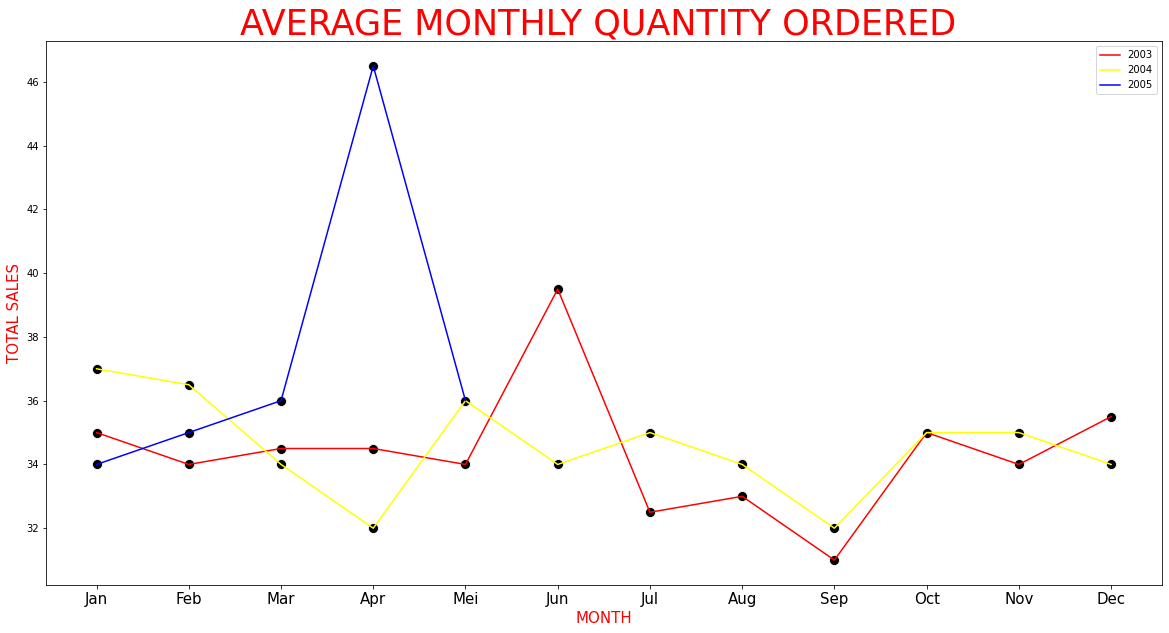

In [ ]:
plt.figure(figsize=(20,10))
sns.lineplot(data=avg2003, x="MONTH_ID", y='QUANTITYORDERED', color='Red', label=2003)
sns.lineplot(data=avg2004, x="MONTH_ID", y='QUANTITYORDERED', color='Yellow', label=2004)
sns.lineplot(data=avg2005, x="MONTH_ID", y='QUANTITYORDERED', color='Blue', label=2005)
sns.scatterplot(data=avg2003, x="MONTH_ID", y='QUANTITYORDERED', s=100, color='Black')
sns.scatterplot(data=avg2004, x="MONTH_ID", y='QUANTITYORDERED', s=100, color='Black')
sns.scatterplot(data=avg2005, x="MONTH_ID", y='QUANTITYORDERED', s=100, color='Black')

ticks = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
labell = ['Jan', 'Feb', 'Mar', 'Apr', 'Mei', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

plt.xticks(ticks, labell,fontsize=15)
plt.title('AVERAGE MONTHLY QUANTITY ORDERED ', fontsize=35, color='Red')
plt.xlabel('MONTH', fontsize=15, color='Red')
plt.ylabel('TOTAL SALES', fontsize=15, color='Red')
plt.legend()

### Top 10 Customer

In [ ]:
top_customer10 = df.groupby(['CUSTOMERNAME'])[['SALES']].sum().sort_values('SALES', ascending=False).head(10)
top_customer10.reset_index(inplace = True) 
top_customer10

,CUSTOMERNAME,SALES
0,Euro Shopping Channel,912294.11
1,Mini Gifts Distributors Ltd.,654858.06
2,"Australian Collectors, Co.",200995.41
3,Muscle Machine Inc,197736.94
4,La Rochelle Gifts,180124.90
5,"Dragon Souveniers, Ltd.",172989.68
6,Land of Toys Inc.,164069.44
7,The Sharp Gifts Warehouse,160010.27
8,"AV Stores, Co.",157807.81
9,"Anna's Decorations, Ltd",153996.13


Text(0, 0.5, 'TOTAL SALES')

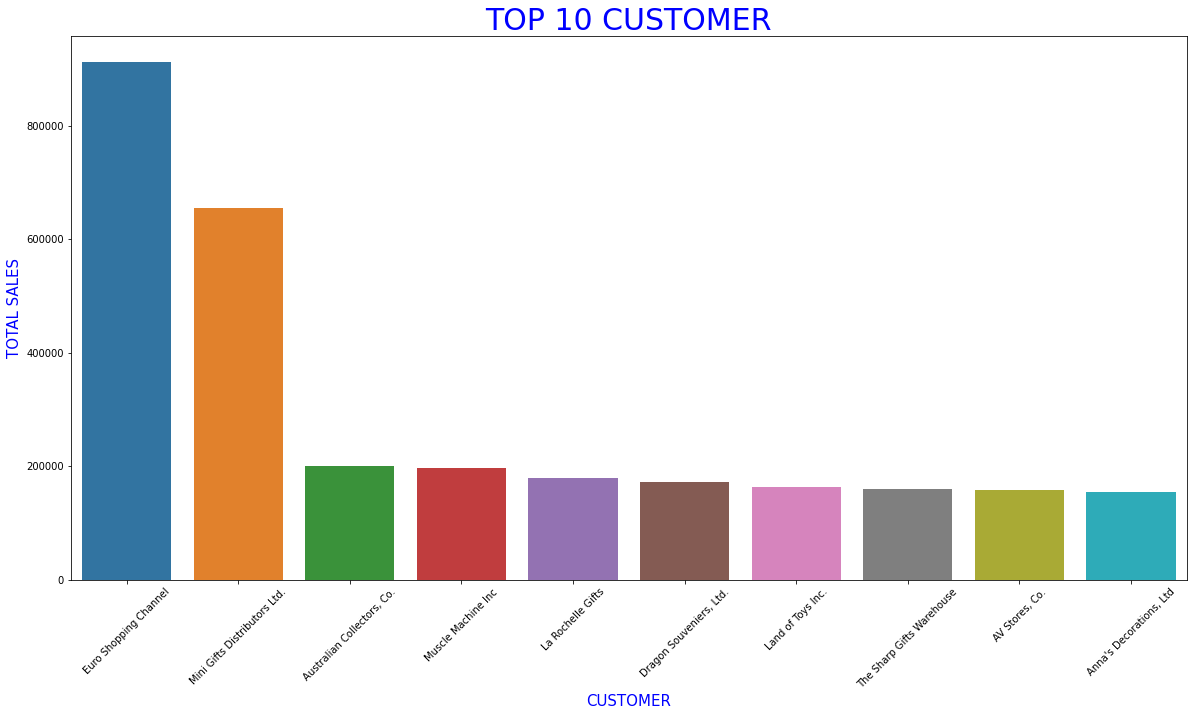

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(data=top_customer10, x='CUSTOMERNAME', y='SALES')
plt.xticks(rotation=45)
plt.title("TOP 10 CUSTOMER", fontsize=30, color="blue")
plt.xlabel("CUSTOMER", fontsize=15, color="blue")
plt.ylabel("TOTAL SALES", fontsize=15, color="blue")

From the graph above, we can see that Euro Shopping Channel the top 1 customer that spend much money for shopping here. So, now we try to see product that they bought

In [ ]:
loyal_customer = df.groupby(['CUSTOMERNAME','DEALSIZE', 'PRODUCTLINE']).agg({'QUANTITYORDERED':'sum'})
loyal_customer = loyal_customer.query("CUSTOMERNAME=='Euro Shopping Channel'")
loyal_customer.reset_index(inplace = True) 
loyal_customer

,CUSTOMERNAME,DEALSIZE,PRODUCTLINE,QUANTITYORDERED
0,Euro Shopping Channel,Large,Classic Cars,243
1,Euro Shopping Channel,Large,Motorcycles,122
2,Euro Shopping Channel,Large,Trucks and Buses,173
3,Euro Shopping Channel,Large,Vintage Cars,40
4,Euro Shopping Channel,Medium,Classic Cars,2114
5,Euro Shopping Channel,Medium,Motorcycles,293
6,Euro Shopping Channel,Medium,Planes,561
7,Euro Shopping Channel,Medium,Ships,424
8,Euro Shopping Channel,Medium,Trains,228
9,Euro Shopping Channel,Medium,Trucks and Buses,488


Text(0, 0.5, 'QUANTITY BOUGHT')

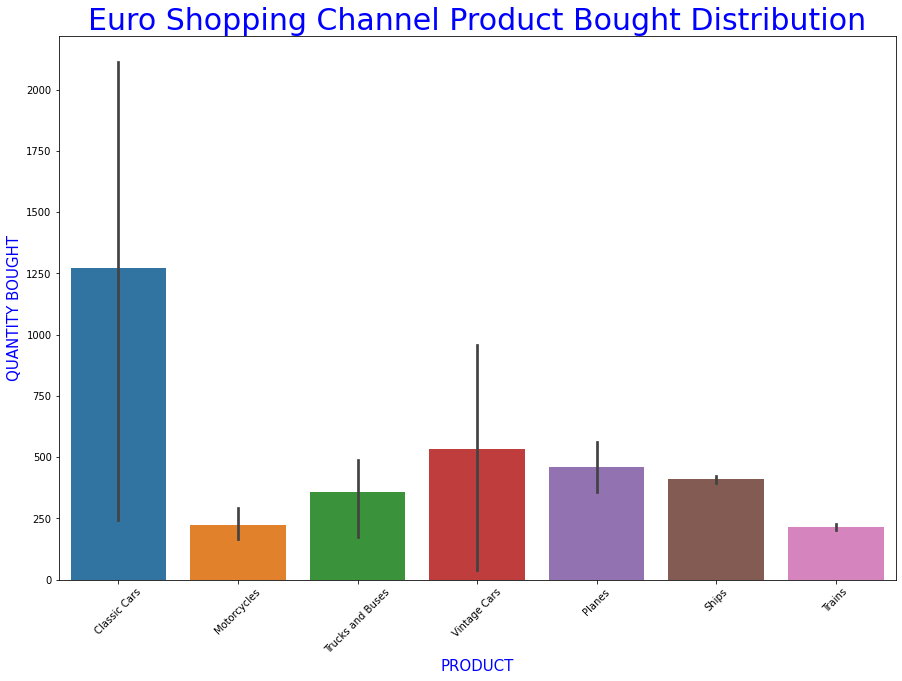

In [ ]:
plt.figure(figsize=(15,10))
sns.barplot(data=loyal_customer, x='PRODUCTLINE', y='QUANTITYORDERED')
plt.xticks(rotation=45)
plt.title("Euro Shopping Channel Product Bought Distribution", fontsize=30, color="blue")
plt.xlabel("PRODUCT", fontsize=15, color="blue")
plt.ylabel("QUANTITY BOUGHT", fontsize=15, color="blue")

### Top 10 Countries

In [ ]:
topcountry = df.groupby(['COUNTRY'])[['SALES']].sum().sort_values('SALES', ascending=False).head(10)
topcountry.reset_index(inplace=True)
topcountry

,COUNTRY,SALES
0,USA,3627982.83
1,Spain,1215686.92
2,France,1110916.52
3,Australia,630623.10
4,UK,478880.46
5,Italy,374674.31
6,Finland,329581.91
7,Norway,307463.70
8,Singapore,288488.41
9,Denmark,245637.15


In [ ]:
fig = px.pie(topcountry,"COUNTRY","SALES")
fig.update_traces(textposition='inside', textinfo='percent+label')

Text(0, 0.5, 'TOTAL SALES')

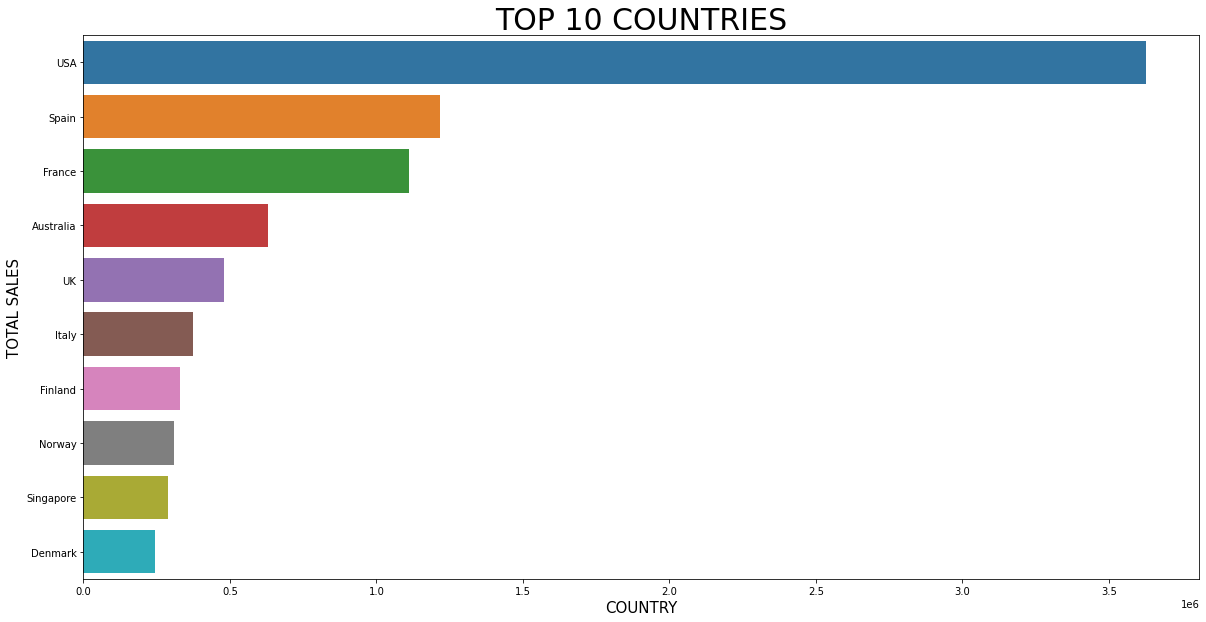

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(data=topcountry,y="COUNTRY",x="SALES")
plt.title("TOP 10 COUNTRIES", fontsize=30)
plt.xlabel("COUNTRY", fontsize=15)
plt.ylabel("TOTAL SALES", fontsize=15)

### Top 10 Cities

In [ ]:
topcity = df.groupby(['CITY'])[['SALES']].sum().sort_values('SALES', ascending=False).head(10)
topcity.reset_index(inplace=True)
topcity

,CITY,SALES
0,Madrid,1082551.44
1,San Rafael,654858.06
2,NYC,560787.77
3,Singapore,288488.41
4,Paris,268944.68
5,San Francisco,224358.68
6,New Bedford,207874.86
7,Nantes,204304.86
8,Melbourne,200995.41
9,Brickhaven,165255.20


Text(0, 0.5, 'TOTAL SALES')

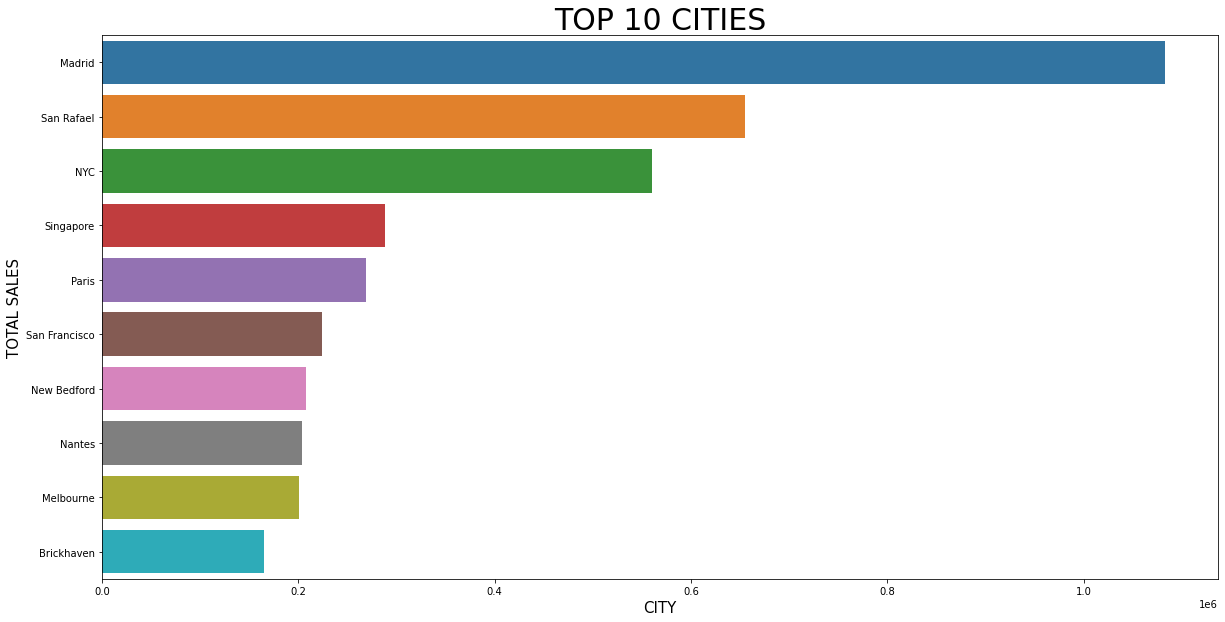

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(data=topcity,y="CITY",x="SALES")
plt.title("TOP 10 CITIES", fontsize=30)
plt.xlabel("CITY", fontsize=15)
plt.ylabel("TOTAL SALES", fontsize=15)

### Top 10 Cities in USA

In [ ]:
topcityUSA = df.groupby(['COUNTRY','CITY'])[['SALES']].sum()
topcityUSA = topcityUSA.query("COUNTRY=='USA'").sort_values('SALES', ascending=False).head(10)
topcityUSA.reset_index(inplace=True)
topcityUSA

,COUNTRY,CITY,SALES
0,USA,San Rafael,654858.06
1,USA,NYC,560787.77
2,USA,San Francisco,224358.68
3,USA,New Bedford,207874.86
4,USA,Brickhaven,165255.20
5,USA,San Jose,160010.27
6,USA,Boston,154069.66
7,USA,Philadelphia,151189.13
8,USA,Cambridge,139244.00
9,USA,Nashua,131685.30


Text(0, 0.5, 'TOTAL SALES')

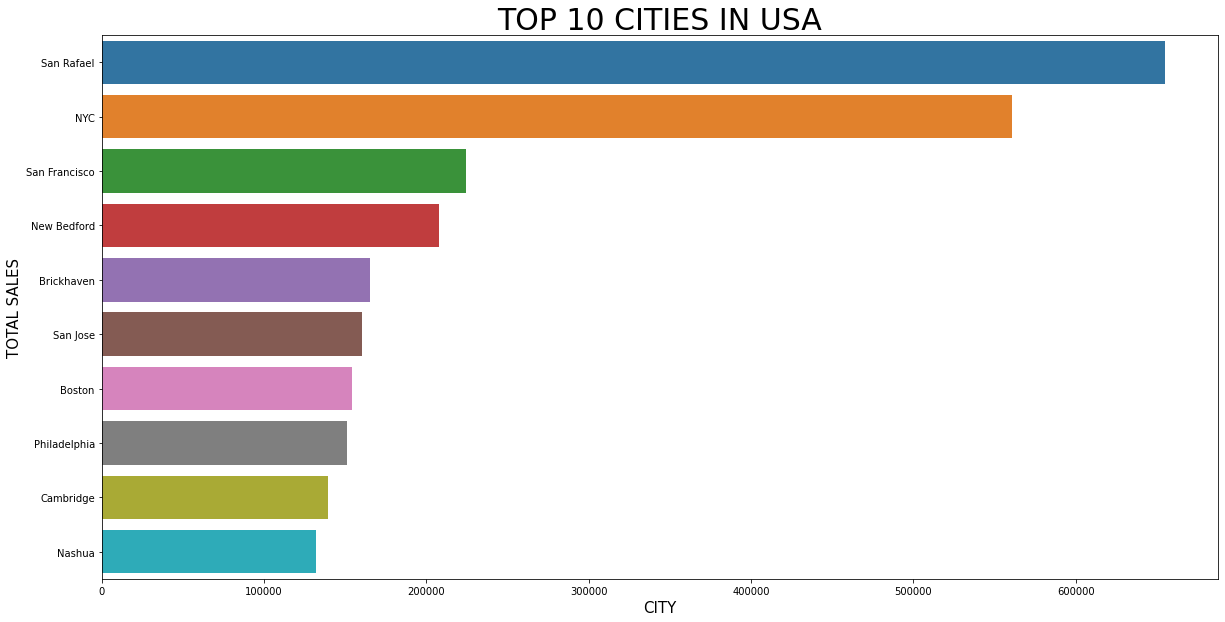

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(data=topcityUSA,y="CITY",x="SALES")
plt.title("TOP 10 CITIES IN USA", fontsize=30)
plt.xlabel("CITY", fontsize=15)
plt.ylabel("TOTAL SALES", fontsize=15)

# **Descriptive Statistics**

In [ ]:
dfa = df.groupby(['YEAR_ID','MONTH_ID'])[['PRICEEACH']].describe()
dfa

PRICEEACH                        ...                       
                     count       mean        std  ...      50%    75%    max
YEAR_ID MONTH_ID                                  ...                       
2003    1             39.0  82.136154  23.907199  ...  100.000  100.0  100.0
        2             41.0  83.940244  17.236220  ...   88.630  100.0  100.0
        3             50.0  81.733400  22.199183  ...   94.520  100.0  100.0
        4             58.0  84.915690  18.832664  ...   96.070  100.0  100.0
        5             58.0  81.951207  21.257233  ...   92.060  100.0  100.0
        6             46.0  84.333261  18.452985  ...   93.130  100.0  100.0
        7             50.0  86.208200  20.092633  ...  100.000  100.0  100.0
        8             58.0  83.211379  19.812885  ...   86.705  100.0  100.0
        9             76.0  84.306974  20.434665  ...  100.000  100.0  100.0
        10           158.0  84.601646  19.840735  ...   99.265  100.0  100.0
        11           296.0  83.506385  20.547234  ...   95.060  100.0  100.0
        12            70.0  83.929286  21.354780  ...   97.980  100.0  100.0
2004    1             91.0  83.257143  19.897326  ...   89.730  100.0  100.0
        2             86.0  83.985116  19.503065  ...   95.515  100.0  100.0
        3             56.0  83.696250  22.331467  ...  100.000  100.0  100.0
        4             64.0  82.529375  20.755889  ...   91.095  100.0  100.0
        5             74.0  84.904595  18.594509  ...   99.420  100.0  100.0
        6             85.0  82.284471  20.134587  ...   89.290  100.0  100.0
        7             91.0  85.663297  17.769054  ...   96.740  100.0  100.0
        8            133.0  83.818421  20.018454  ...   99.290  100.0  100.0
        9             95.0  82.847895  20.633015  ...   96.340  100.0  100.0
        10           159.0  83.309182  21.227783  ...   95.550  100.0  100.0
        11           301.0  83.961927  19.854764  ...   95.130  100.0  100.0
        12           110.0  82.823000  20.530167  ...   96.495  100.0  100.0
2005    1             99.0  84.162323  20.562201  ...   96.920  100.0  100.0
        2             97.0  84.930103  20.340807  ...  100.000  100.0  100.0
        3            106.0  81.688208  19.853973  ...   87.035  100.0  100.0
        4             56.0  81.362321  20.979080  ...   88.275  100.0  100.0
        5            120.0  84.177500  20.492079  ...   99.125  100.0  100.0

[29 rows x 8 columns]

In [ ]:
dfaa = dfa.query("YEAR_ID=='2005'" and "MONTH_ID=='4'")
dfaa.sort_values('YEAR_ID', ascending=False)

PRICEEACH                        ...                      
                     count       mean        std  ...     50%    75%    max
YEAR_ID MONTH_ID                                  ...                      
2005    4             56.0  81.362321  20.979080  ...  88.275  100.0  100.0
2004    4             64.0  82.529375  20.755889  ...  91.095  100.0  100.0
2003    4             58.0  84.915690  18.832664  ...  96.070  100.0  100.0

[3 rows x 8 columns]

In [ ]:
dfaa2 = dfa.query("YEAR_ID=='2005'" and "MONTH_ID=='5'")
dfaa2.sort_values('YEAR_ID', ascending=False)

PRICEEACH                        ...                      
                     count       mean        std  ...     50%    75%    max
YEAR_ID MONTH_ID                                  ...                      
2005    5            120.0  84.177500  20.492079  ...  99.125  100.0  100.0
2004    5             74.0  84.904595  18.594509  ...  99.420  100.0  100.0
2003    5             58.0  81.951207  21.257233  ...  92.060  100.0  100.0

[3 rows x 8 columns]